In [1]:
#Initiate Pymol RPC module
import os, sys, glob, subprocess, math, random
from copy import deepcopy
from PIL import Image
import numpy as np
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdCoordGen, Descriptors, rdMolHash
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdMolDescriptors import CalcMolFormula,CalcExactMolWt
from ipywidgets import interact, interactive, fixed, IntSlider
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addBondIndices = False
IPythonConsole.molSize = 500,500

from ase.io import read, write
from ase import Atoms, Atom
#import pybel

#from xml.parsers.expat import model
from molecularsolidbuilder.Hydrocarbons_Builder import *
from molecularsolidbuilder.Combine_Subunits import Combine_Random, Combine_MD, Crosslink_SMILES_C, Crosslink_withC, Crosslink_MMFF94s
from molecularsolidbuilder.PDBfile_Converter import PDBImageFileToMols, MolsToPDBImageFile
from molecularsolidbuilder.Molfile_Converter import MOLImageFileToMols, MolsToMOLImageFile
from molecularsolidbuilder.Heteroatom_Exchanger import *
from molecularsolidbuilder.Utility import *
from molecularsolidbuilder.Examine_CNMR import *
from molecularsolidbuilder.pymol_rpc import pymol_jupyter_builder
from molecularsolidbuilder.MinimumBoundingBox3D import *

In [2]:
#import two individual molecules in PDB file format
mol1 = AllChem.MolFromPDBFile('mol_1.pdb')
mol2 = AllChem.MolFromPDBFile('mol_2.pdb')

In [3]:
#crosslinking two molecules with every pairs, optimize geometry using MMFF94s and check the energy
crss_mols = Crosslink_MMFF94s(mol1,mol2)

In [8]:
mols = crss_mols[:,0] # List of molecules
MMFF94s_energy = crss_mols[:,1] # List of energy. the lower, the more stable

In [9]:
MMFF94s_energy # total energy of molecules in kcal/mol using MMFF94s

array([608.5378110886012, 609.1494465197941, 609.4929055307892,
       609.8860267153269, 610.7386128980191, 610.7990914126432,
       611.1221634271471, 611.6104558952757, 611.6721400574546,
       611.9615095839557, 612.1062180520958, 612.5686003330421,
       612.6790596562146, 612.6965289374995, 612.7117939529927,
       612.772688134713, 612.9068862287066, 612.9072587771295,
       612.9944903276887, 613.0633608562343, 613.1392493178149,
       613.1851790135196, 613.2568668849286, 613.2609305275092,
       613.3100576774776, 613.348813775246, 613.355700289583,
       613.3623112679873, 613.4368967470515, 613.5124493408524,
       613.6544225184454, 613.6837559358837, 613.6933780326507,
       613.7331519084876, 613.9171021485972, 614.0590923674764,
       614.0612456845299, 614.0732448259307, 614.2834596275197,
       614.341749139554, 614.4665791961352, 614.5748358186944,
       614.7528181235461, 615.1328140105569, 615.1906565006681,
       615.3359599850918, 615.4037858252485,

In [6]:
#Save the molecules in PDB file format
for i, cmol in enumerate(mols):
    AllChem.MolToPDBFile(cmol,'./crosslinked_mols/crosslink_%d.pdb' % (i+1))

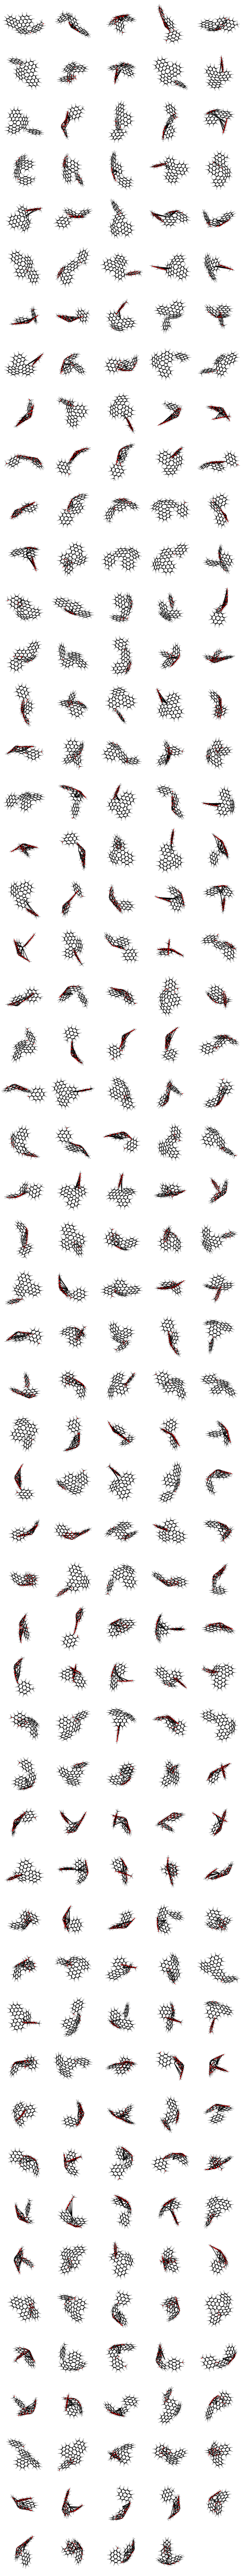

In [11]:
Draw.MolsToGridImage(crss_mols[:,0],
                    #legends=test_info,
                    molsPerRow=5, 
                    subImgSize=(200,200),
                    maxMols=999999)